### Instituto Tecnológico de Costa Rica (ITCR)
### Escuela de Computación
### Curso: Inteligencia Artificial
 
### Cuarta tarea programada 


Profesora: María Auxiliadora Mora

Estudiantes:
 1. Pablo Alberto Muñoz Hidalgo
 2. Luis Andrés Rojas Murillo

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en Jupyter ( .IPYNB ). 

Modo de trabajo: En parejas.

--- 

 

### Area de estudio: 
GPT sugirió estas posibles áreas 

- Datos de censo: El Instituto Nacional de Estadística y Censos (INEC) de Costa Rica proporciona datos demográficos y socioeconómicos recopilados a través de los censos nacionales. Estos datos pueden incluir información sobre la población, viviendas, ingresos, educación, empleo, entre otros.

- Datos de salud: La Caja Costarricense de Seguro Social (CCSS) y el Ministerio de Salud de Costa Rica recopilan datos relacionados con la salud, como estadísticas de enfermedades, atención médica, hospitales y clínicas, medicamentos, etc.

- Datos ambientales: El Ministerio de Ambiente y Energía (MINAE) y otras organizaciones gubernamentales y no gubernamentales en Costa Rica recopilan datos sobre el medio ambiente, como la calidad del aire y del agua, biodiversidad, áreas protegidas, cambio climático, entre otros.

- Datos de transporte: El Consejo de Transporte Público (CTP) y el Ministerio de Obras Públicas y Transportes (MOPT) proporcionan datos relacionados con el transporte público, infraestructuras de transporte, flotas de vehículos, rutas, horarios, etc.

- Datos económicos: El Banco Central de Costa Rica y otras instituciones financieras proporcionan datos económicos y financieros, como indicadores macroeconómicos, comercio exterior, tasas de interés, inflación, entre otros.

- Redes sociales y datos en línea: Las redes sociales y otras plataformas en línea pueden proporcionar datos que reflejen el comportamiento y las interacciones de las personas en Costa Rica. Estos datos pueden incluir publicaciones, comentarios, perfiles de usuarios, conexiones entre usuarios, etc.

# Parte 1

## Definición del proyecto 

### Justificación:


### Antecedentes:
4 articulos cientificios relacionados al area de estudio

### Marco teórico:
#### - Algoritmos a utilizar
gpt sugirió estos como un top 4 de los mas faciles, e incluyo los que la profe dijo que debian de ir si o si 
-  K-means: Es uno de los algoritmos de clustering más utilizados y fáciles de implementar. Se basa en asignar puntos a clusters en función de su proximidad a los centroides de los grupos.
-  Mean Shift: Este algoritmo también es relativamente sencillo de implementar. Utiliza un enfoque de búsqueda de densidad para encontrar los centroides de los clusters.
-  DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Es un algoritmo basado en la densidad que puede descubrir clusters de formas y tamaños arbitrarios. Es un poco más complejo de implementar que K-means y Mean Shift, ya que requiere la configuración de parámetros adicionales.
-  Agglomerative Hierarchical Clustering: Este enfoque de clustering construye una jerarquía de clusters de manera incremental. Comienza considerando cada punto como un cluster individual y luego fusiona los clusters hasta obtener un número deseado de grupos. La implementación puede ser un poco más compleja que los algoritmos anteriores debido a la manipulación de la jerarquía.

#### - Definicion del problema:



#### - Objetivos:

#### - Fuentes de datos:

## Metodología

## Resultados 

## Referencias

1. https://ieeexplore.ieee.org/document/7872990
2. https://link.springer.com/chapter/10.1007/978-3-030-00563-4_59
3. https://dl.acm.org/doi/10.3233/IDA-170883
4. https://www.ajol.info/index.php/njt/article/download/197612/186402

# Parte 2


Aqui se va a trabajar el tema del código y el clustering de datos utilizando cada uno de los algoritmos

C:\Users\pablo\AppData\Local\Temp\ipykernel_11356\934428093.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Nacionalidad'][i] = 2
C:\Users\pablo\AppData\Local\Temp\ipykernel_11356\934428093.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Nacionalidad'][i] = 2
C:\Users\pablo\AppData\Local\Temp\ipykernel_11356\934428093.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Nacionalidad'][i] = 2
C:\Users\pablo\A

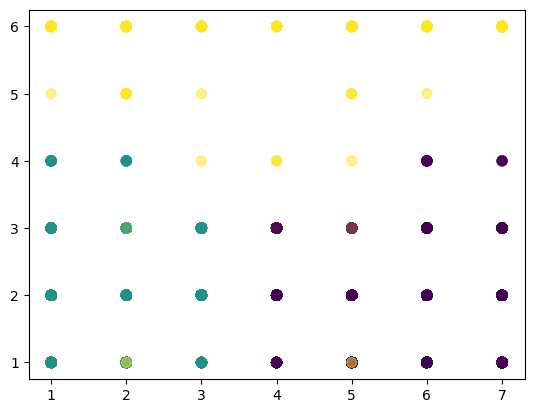

KMeans
[0 0 1 ... 1 0 0]


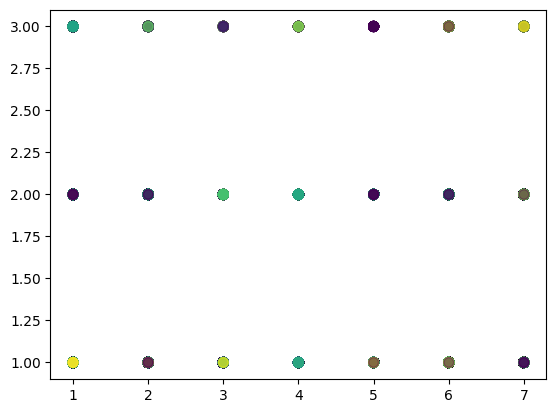

KeyboardInterrupt: 

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"""
Primero se leen los datos del csv llamado data que contiene datos de criminalidad en Costa Rica, tiene 13 columnas:
Delito,SubDelito,Fecha,Victima,SubVictima,Edad,Genero,Nacionalidad,Provincia,Canton,Distrito,
"""
data = pd.read_csv('data.csv', sep=',', header=0, encoding='latin-1')
data.head()


# elimina la columna "Canton"
data = data.drop(['Canton'], axis=1)
# elimina la columan "SubVictima"
data = data.drop(['SubVictima'], axis=1)
# elimina la columna "Victima"
data = data.drop(['Victima'], axis=1)
# elimina la columan "hora"
data = data.drop(['Hora'], axis=1)
# elimina la columan "Fecha"
data = data.drop(['Fecha'], axis=1)
# elimina la columan "SubDelito"
data = data.drop(['SubDelito'], axis=1)
#Drop unnamed column
data = data.drop(['Unnamed: 11'], axis=1)

# Elimina las filas que no enacajen con la amyoria
data = data.dropna()

#Se asigna 1 a HOMBRE y 2 a MUJER
data['Genero'] = data['Genero'].replace(['HOMBRE', 'MUJER', 'DESCONOCIDO'], [1, 2, 3])

#Se asina del 1 al 8 el tipo de delito
data['Delito'] = data['Delito'].replace(['ASALTO', 'HURTO', 'ROBO', 'TACHA DE VEHICULO', 'ROBO DE VEHICULO', 'HOMICIDIO'], [1, 2, 3, 4, 5, 6])

#Se asigna 1 a Mayor de edad, 2 a Menor de edad y 3 a Adulto Mayor
data['Edad'] = data['Edad'].replace(['Menor de edad', 'Mayor de edad', 'Adulto Mayor', 'Desconocido'], [1, 2, 3, 4])

#Se asigna del 1 al 7 a las provincias de Costa Rica
data['Provincia'] = data['Provincia'].replace(['SAN JOSE', 'ALAJUELA', 'CARTAGO', 'HEREDIA', 'GUANACASTE', 'PUNTARENAS', 'LIMON'], [1, 2, 3, 4, 5, 6, 7])

#Se asigna 1 si nacionalidad es 'COSTA RICA', 2 si es otro y 3 si es 'DESCONOCIDO'
data['Nacionalidad'] = data['Nacionalidad'].replace(['COSTA RICA', 'DESCONOCIDO'], [1, 3])

#Go through every row in 'Nacionalidad' column with a for
for i in range(data.shape[0]):
    #If the value is not 1 or 3
    if data['Nacionalidad'][i] != 1 and data['Nacionalidad'][i] != 3:
        #Set the value to 2
        data['Nacionalidad'][i] = 2


#Define a dataframe about it
df = pd.DataFrame(data)

#Cluster the data using KMean
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
#Print a graphic about it using provincia, delito and genero
plt.scatter(df['Provincia'], df['Delito'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(df['Provincia'], df['Genero'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.show()

#Print results 
print("KMeans")
print(kmeans.labels_)


#Cluster the data using DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10).fit(df)
#Print a graphic about it using provincia
plt.scatter(df['Provincia'], df['Genero'], c=dbscan.labels_.astype(float), s=50, alpha=0.5)
plt.show()

#Cluster the data using AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=3).fit(df)
#Print a graphic about it using provincia, delito and genero
plt.scatter(df['Provincia'], df['Delito'], c=agglomerative.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(df['Provincia'], df['Genero'], c=agglomerative.labels_.astype(float), s=50, alpha=0.5)
plt.show()

#Cluster the data using Mean Shift
from sklearn.cluster import MeanShift
mean_shift = MeanShift().fit(df)
#Print a graphic about it using provincia
plt.scatter(df['Provincia'], df['Delito'], c=mean_shift.labels_.astype(float), s=50, alpha=0.5)
plt.show()







